In [1]:
 # Load our Libaries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# training and test data
train = pd.read_csv('data/sign_mnist_train/sign_mnist_train.csv')
test = pd.read_csv('data/sign_mnist_test/sign_mnist_test.csv')

In [3]:
train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [4]:
# get our training labels
labels = train['label'].values

In [5]:
unique_val = np.array(labels)
np.unique(unique_val)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24], dtype=int64)

<AxesSubplot:ylabel='count'>

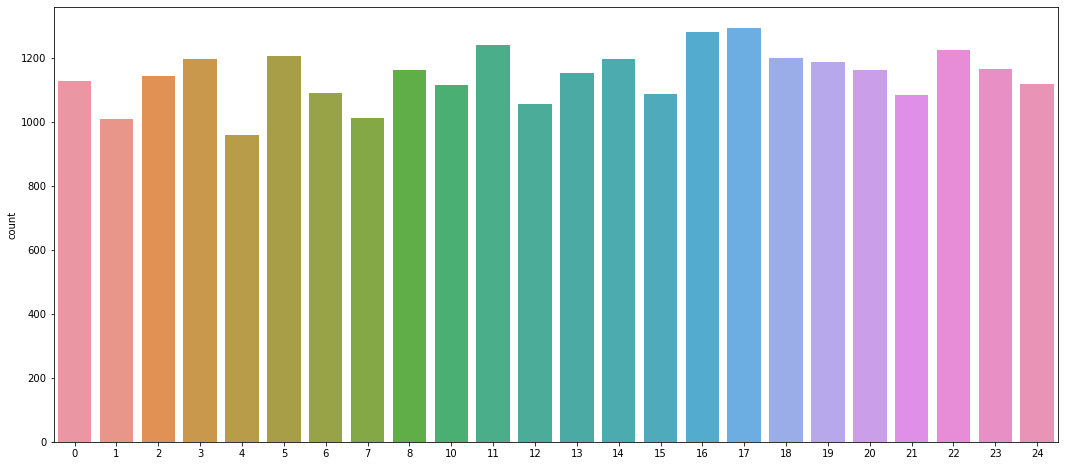

In [6]:
# plot quantities in each class
plt.figure(figsize = (18,8))
sns.countplot(x=labels)

In [7]:
# drop training labels
train.drop('label',axis =1,inplace = True)

In [8]:
# extract image data from each row in csv
images = train.values
images = np.array([np.reshape(i,(28,28)) for i in images])
images = np.array([i.flatten() for i in images])

In [9]:
# hotone encode our labels
from sklearn.preprocessing import LabelBinarizer

label_binrizer = LabelBinarizer()
labels = label_binrizer.fit_transform(labels)

In [10]:
# view labels
labels

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0]])

[0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


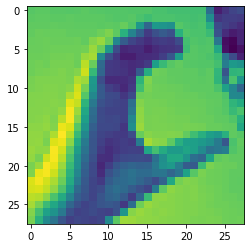

In [14]:
# inspect an image
index =2
print(labels[index])
plt.imshow(images[index].reshape(28,28))

In [15]:
# use OpenCV to view 10 random images from our training data

import cv2
import numpy as np

for i in range(0, 10):
    rand = np.random.randint(0, len (images))
    input_im = images [rand]
    
    sample = input_im.reshape (28,28).astype(np.uint8)
    sample= cv2.resize(sample, None, fx=10, fy=10, interpolation = cv2.INTER_CUBIC)
    cv2.imshow("sample image", sample)
    cv2.waitKey(0)
    
cv2.destroyAllWindows()

In [16]:
# split our data intp x_train, x_test, y_train, y_test
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size=0.3,random_state=101)

In [17]:
# start loading tensorflow modules and define batch size
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout

batch_size = 128
num_classes = 24
epochs =10

In [18]:
# scale our images
x_train = x_train/255
x_test = x_test / 255

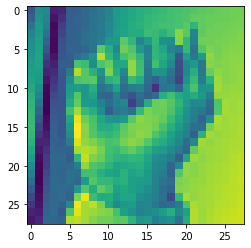

In [19]:
# reshape into size captured by tf and keras
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

plt.imshow(x_train[0].reshape(28,28))

In [25]:
# create CNN Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import backend as K
from tensorflow.keras.optimizers import Adam

model = Sequential()
model.add(Conv2D(64, kernel_size=(3,3), activation = 'relu', input_shape=(28,28,1) ))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Conv2D(64, kernel_size = (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Conv2D(64, kernel_size = (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.20))

model.add(Dense(24, activation = 'sigmoid'))

print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 1, 1, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 64)               

In [26]:
# compile model
model.compile(loss='categorical_crossentropy',
             optimizer=Adam(),
             metrics=['accuracy'])

In [27]:
# train model
history = model.fit(x_train, y_train, validation_data = (x_test,y_test), epochs=epochs, batch_size=batch_size)

Epoch 1/10
151/151 [==============================] - 18s 117ms/step - loss: 2.6692 - accuracy: 0.1755 - val_loss: 1.8060 - val_accuracy: 0.4436
Epoch 2/10
151/151 [==============================] - 28s 187ms/step - loss: 1.2797 - accuracy: 0.5673 - val_loss: 0.7889 - val_accuracy: 0.7432
Epoch 3/10
151/151 [==============================] - 29s 194ms/step - loss: 0.7422 - accuracy: 0.7472 - val_loss: 0.5279 - val_accuracy: 0.8327
Epoch 4/10
151/151 [==============================] - 28s 188ms/step - loss: 0.4863 - accuracy: 0.8406 - val_loss: 0.3012 - val_accuracy: 0.9148
Epoch 5/10
151/151 [==============================] - 28s 184ms/step - loss: 0.3159 - accuracy: 0.8980 - val_loss: 0.1832 - val_accuracy: 0.9488
Epoch 6/10
151/151 [==============================] - 28s 186ms/step - loss: 0.2222 - accuracy: 0.9285 - val_loss: 0.1357 - val_accuracy: 0.9608
Epoch 7/10
151/151 [==============================] - 28s 188ms/step - loss: 0.1500 - accuracy: 0.9553 - val_loss: 0.0792 - val_ac

In [28]:
# save our model
model.save("sign_mnist_ep.h5")
print("MODEL SAVED")

MODEL SAVED


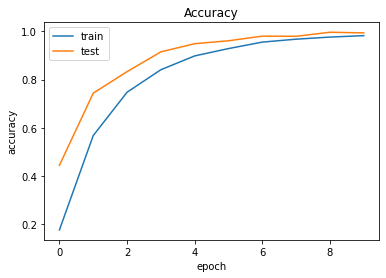

In [29]:
# view our training history graphically
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Accuracy")
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train','test'])

plt.show()

In [30]:
# reshape our test data so that we can evaluate it's performance on unseen data
test_labels = test['label']
test.drop('label',axis = 1, inplace = True)

test_images = test.values
test_images = np.array([np.reshape (i, (28, 28)) for i in test_images])
test_images = np.array([i.flatten() for i in test_images])

test_labels = label_binrizer.fit_transform(test_labels)
test_images = test_images.reshape(test_images.shape [0], 28, 28, 1)
test_images.shape
y_pred = model.predict(test_images)

In [31]:
# get accuracy score
from sklearn.metrics import accuracy_score

accuracy_score(test_labels, y_pred.round())

0.009063022866703848

In [32]:
# create function to match label to letter
def getLetter(result):
    classLabels={ 0: 'A',
                  1: 'B',
                  2: 'C',
                  3: 'D',
                  4: 'E',
                  5: 'F',
                  6: 'G',
                  7: 'H',
                  8: 'I',
                  9: 'K',
                  10: 'L',
                  11: 'M',
                  12: 'N',
                  13: 'O',
                  14: 'P',
                  15: 'Q',
                  16: 'R',
                  17: 'S',
                  18: 'T',
                  19: 'U',
                  20: 'V',
                  21: 'W',
                  22: 'X',
                  23: 'Y'}
    try:
        res =  int(result)
        return classLabels[res]
    except:
        return 'Error'

In [37]:
# test on webcam
cap = cv2.VideoCapture(0)

while True:

    ret, frame = cap.read()
    
    ##############################
    frame=cv2.flip(frame, 1)

    #define region of interest
    roi = frame[100:400, 320:620]
    cv2.imshow('roi', roi)
    roi = cv2.cvtColor(roi, cv2.COLOR_BGR2GRAY)
    roi = cv2.resize(roi, (28, 28), interpolation = cv2.INTER_AREA)
    
    cv2.imshow('roi scaled and gray', roi)
    copy = frame.copy()
    cv2.rectangle(copy, (320, 100), (620, 400), (255,0,0), 5)
    
    roi = roi.reshape(1,28,28,1) 
    #roi = roi/255
    result = str(model.predict_classes(roi, 1, verbose = 0)[0])
    cv2.putText(copy, getLetter(result), (300 , 100), cv2.FONT_HERSHEY_COMPLEX, 2, (0, 255, 0), 2)
    cv2.imshow('frame', copy)    
    
    if cv2.waitKey(1) == 13: #13 is the Enter Key
        break
        
cap.release()
cv2.destroyAllWindows() 

In [39]:
getLetter(result)
result

'3'